In [1]:
import math
import pandas as pd
import cv2
import numpy as np
import torch
from torch import nn
from torch import optim
from matplotlib import pyplot as plt

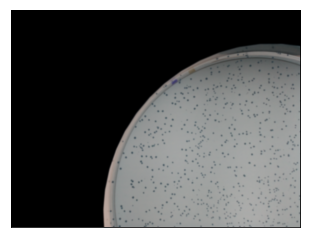

In [10]:
BR = cv2.imread("Plate Images/2019-08-02_15.41.53/Camera-0/4/image-00000.jpg")
BL = cv2.imread("Plate Images/2019-08-02_15.41.53/Camera-1/4/image-00000.jpg")
TR = cv2.imread("Plate Images/2019-08-02_15.41.53/Camera-2/4/image-00000.jpg")
TL = cv2.imread("Plate Images/2019-08-02_15.41.53/Camera-3/4/image-00000.jpg")
plt.imshow(TL, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

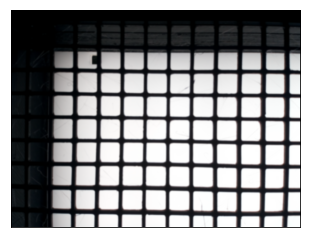

In [2]:
BR = cv2.imread("Plate Images/2019-08-02_17.46.20-calibration-grid/Camera-0/1/image-00000.jpg")
BL = cv2.imread("Plate Images/2019-08-02_17.46.20-calibration-grid/Camera-1/1/image-00000.jpg")
TR = cv2.imread("Plate Images/2019-08-02_17.46.20-calibration-grid/Camera-2/1/image-00000.jpg")
TL = cv2.imread("Plate Images/2019-08-02_17.46.20-calibration-grid/Camera-3/1/image-00000.jpg")
plt.imshow(TL, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [3]:
def stitch(toStitch,shape,overlap):
    #crop the images
    toStitch = crop(toStitch,overlap)
    #stitch them together
    stitched =list()
    for img in range(len(toStitch[0])):
        xStitched = list()
        for x in range(shape[0]-1):
            xStitched = list()
            for y in range(shape[1]):
                concat = np.concatenate((toStitch[x+y*shape[0]][img],toStitch[x+y*shape[0]+1][img]),axis=0)
                xStitched.append(concat)
        concat = [[0]]
        for y in range(shape[1]-1):
            concat = np.concatenate((xStitched[y],xStitched[y+1]),axis=1)
        stitched.append(concat)
    if shape == [1,1]:
        return toStitch[0]
    else:
        return stitched
def testStitch(toStitch,shape,overlap):
    #crop the images
    toStitch = crop(toStitch,overlap)
    #stitch them together
    stitched =list()
    for img in range(len(toStitch[0])):
        xStitched = list()
        for x in range(shape[0]-1):
            xStitched = list()
            for y in range(shape[1]):
                concat = np.concatenate((toStitch[x+y*shape[0]][img],toStitch[x+y*shape[0]+1][img]),axis=0)
                xStitched.append(concat)
        cv2.namedWindow("0", cv2.WINDOW_NORMAL)
        cv2.imshow('0',xStitched[0])
        cv2.namedWindow("1", cv2.WINDOW_NORMAL)
        cv2.imshow('1',xStitched[1])
        cv2.waitKey(0)
        concat = [[0]]
        for y in range(shape[1]-1):
            concat = np.concatenate((xStitched[y],xStitched[y+1]),axis=1)
        stitched.append(concat)
    return stitched
def crop(toStitch, overlap):
    pixelOverlap = (overlap[0]*toStitch[0][0].shape[0],overlap[1]*toStitch[0][0].shape[1])
    cropped = list()
    for cam in range(len(toStitch)):
        perCam = list()
        for i in range(len(toStitch[cam])):
            perCam.append(toStitch[cam][i][0:int(toStitch[cam][i].shape[1]-(pixelOverlap[1]/2)),0:int(toStitch[cam][i].shape[0]-(pixelOverlap[0]/2))])
        cropped.append(perCam)
    return cropped

In [7]:
toStitch = [[TL],[BL],[TR],[BR]]
res = stitch(toStitch,(2,2),(0,0))[0]
res1 = stitch(toStitch,(2,2),(0.2,0))[0]
def showImages(images):
    count = 0
    for img in images:
        windowName = "img" + str(count)
        cv2.namedWindow(windowName, cv2.WINDOW_NORMAL)
        cv2.imshow(windowName,img)
        cv2.waitKey(0)
        count += 1
    cv2.destroyAllWindows()
showImages([res, res1])